In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


Importing The netflix dataset from Kaggle [Dataset Link](https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows/data)


In [ ]:
df=pd.read_csv("netflix_titles.csv",encoding='latin 1')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Above we can see that there are so many unnamed columns with null values so we drop them

In [ ]:
df.dropna(axis=1,how='all',inplace=True)
columns=df.columns
print(columns)



Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
df.shape

(8809, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


Lets look out how many unique values each column have

In [ ]:
df.nunique()

,0
show_id,8809
type,2
title,8806
director,4529
cast,7694
country,748
date_added,1768
release_year,75
rating,18
duration,220


Here we can see that type is a categorical variable having 2 values:movies and tv shows.

**Missing data handling**

In [ ]:
df.isnull().sum()
df.isnull().sum()/len(df)*100

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.901237
cast,9.365422
country,9.433534
date_added,0.113520
release_year,0.000000
rating,0.045408
duration,0.034056


In the current analysis the column director and cast wont be used in analysis so we can drop them

In [ ]:
netflix=df.copy()
netflix.drop(columns=['director','cast'], inplace=True)


In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Now for the remaining columns we will fill them with 'missing' to show it in analysis

In [ ]:

netflix.fillna({'country':'missing','rating':'missing','duration':'missing'})

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,South Korea,"April 5, 2024",2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


Checking for duplicates

In [ ]:
netflix.duplicated().sum()

0

No duplicate rows

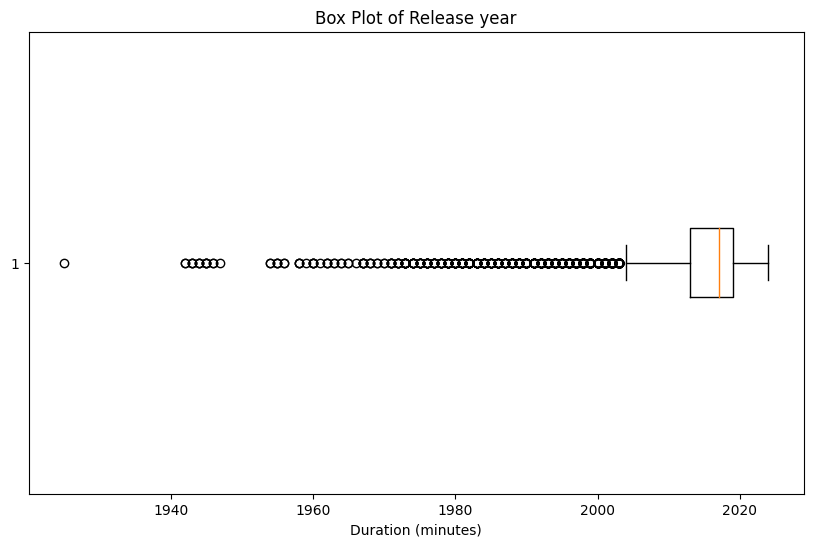

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.boxplot(df['release_year'], vert=False)
plt.title('Box Plot of Release year')
plt.xlabel('Duration (minutes)')  # Set the x-axis label
plt.show()  # Display the plot

In [ ]:
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return netflix[(data < lower_bound) | (data > upper_bound)]
release_year_outliers = find_outliers_iqr(netflix['release_year'])
print(release_year_outliers.count())
# Convert 'release_year' column to numeric, handling errors
release_year_outliers.loc[:,'release_year'] = pd.to_numeric(release_year_outliers['release_year'], errors='coerce')


show_id         719
type            719
title           719
director        642
cast            700
country         691
date_added      717
release_year    719
rating          719
duration        719
listed_in       719
description     719
dtype: int64


Here there are lot of outliers in mathematical sense but ideally they need not be outliers so inorder to judge we see how many movies and tv shows were released in these years and plot a bar graph

It can be seen that very movies where released when compared to the data after so we can drop the outliers

In [ ]:
def drop_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # 25th percentile
    Q3 = data.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    return data[(data >= lower_bound) & (data <= upper_bound)]  # Filter data
  # Drop outliers for Release Year
netflix.loc[:,'release_year'] = drop_outliers_iqr(netflix['release_year']).astype(int)

# Remove rows with NaN values generated from outlier removal
netflix = netflix.dropna(subset=['release_year'])

# Display the cleaned DataFrame
print("DataFrame after dropping outliers:")
netflix.info()



DataFrame after dropping outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 8090 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8090 non-null   object 
 1   type          8090 non-null   object 
 2   title         8090 non-null   object 
 3   director      5533 non-null   object 
 4   cast          7284 non-null   object 
 5   country       7287 non-null   object 
 6   date_added    8082 non-null   object 
 7   release_year  8090 non-null   float64
 8   rating        8086 non-null   object 
 9   duration      8087 non-null   object 
 10  listed_in     8090 non-null   object 
 11  description   8090 non-null   object 
dtypes: float64(1), object(11)
memory usage: 821.6+ KB


<ipython-input-72-1cb02e61a067>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2020. 2021. 2021. ... 2015. 2024. 2014.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  netflix.loc[:,'release_year'] = drop_outliers_iqr(netflix['release_year']).astype(int)


The bar graph shows the increase in demand of shows in the entertainment industry

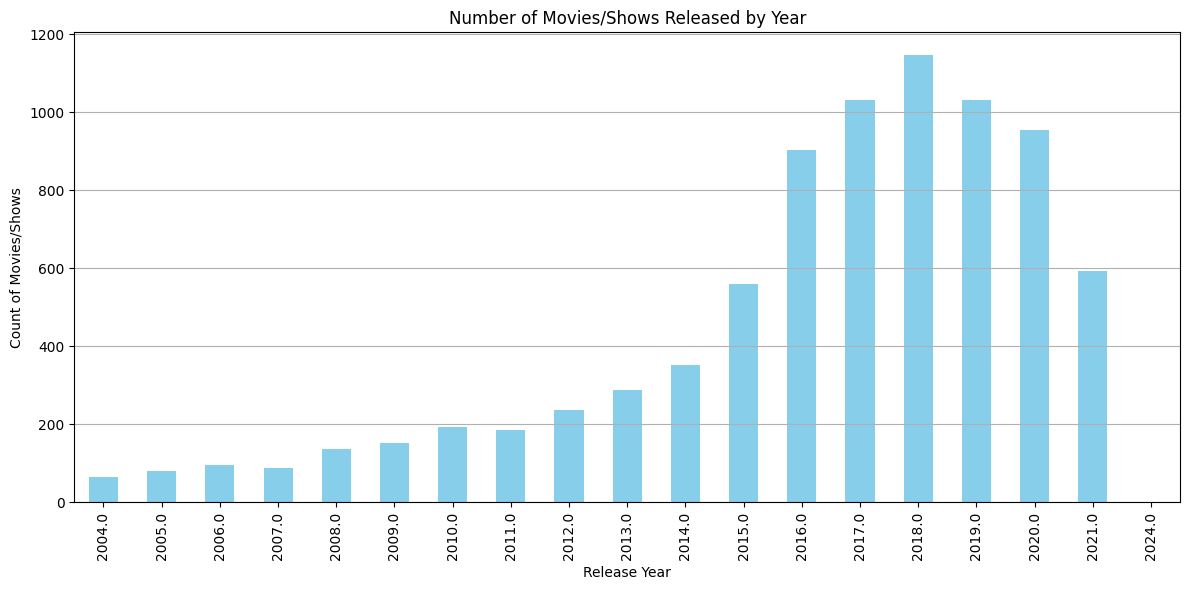

In [ ]:
release_counts = netflix['release_year'].value_counts().sort_index()


plt.figure(figsize=(12, 6))  # Set the figure size
release_counts.plot(kind='bar', color='skyblue')  # Create bar graph
plt.title('Number of Movies/Shows Released by Year')  # Add title
plt.xlabel('Release Year')  # Label for x-axis
plt.ylabel('Count of Movies/Shows')  # Label for y-axis
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

The date it was added is object type it should be converted into

In [ ]:
netflix.type.value_counts()

,count
type,
Movie,5488
TV Show,2602


**Converting date_added from object datatype to date and time**

In [ ]:
netflix['date_added']=pd.to_datetime(netflix['date_added'],errors='coerce')
netflix['year_added'] = netflix["date_added"].dt.year
netflix['month_added'] = netflix["date_added"].dt.month


In [ ]:
netflix.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,float64
rating,object
duration,object


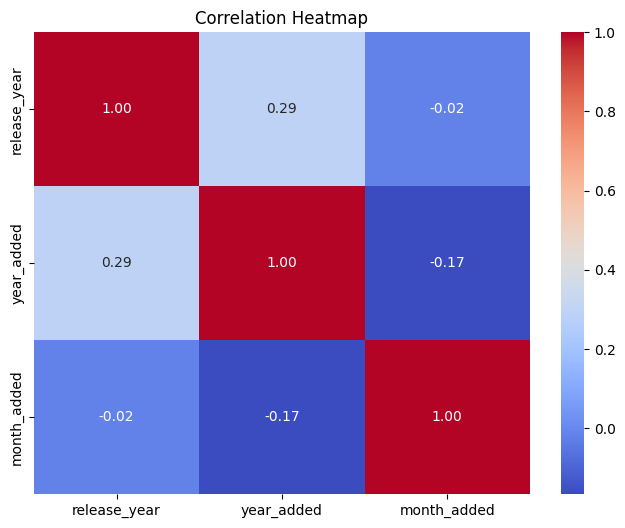

In [ ]:
sub_set=netflix[['release_year','year_added','month_added']]
correlation_matrix = sub_set.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Obeservation : Above Heatmap shows correlation between release_year,year_added & month_added.



([0, 1], [Text(0, 0, 'Movie'), Text(1, 0, 'TV Show')])

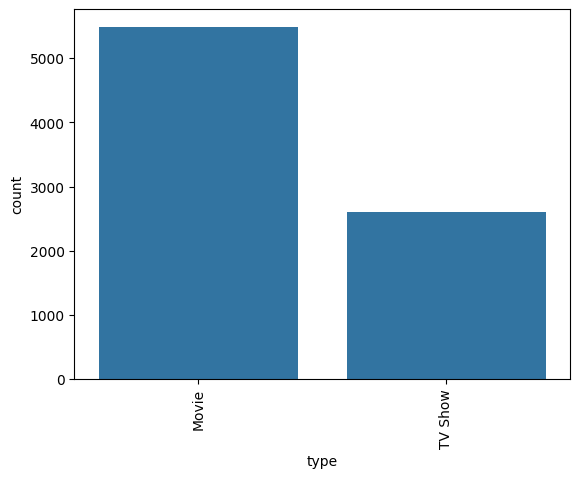

In [ ]:
sns.countplot(x=netflix['type'],orient='v')
plt.xticks(rotation=90)

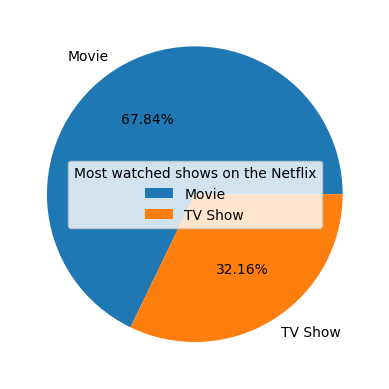

In [ ]:
# by using Pie chart
type_show = ['Movie','TV Show']
Value_count = [5488,2602]
plt.pie(Value_count,labels=type_show,autopct="%2.2f%%")
plt.legend(title='Most watched shows on the Netflix')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'TV-MA'),
  Text(2, 0, 'PG'),
  Text(3, 0, 'TV-14'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'TV-Y7'),
  Text(7, 0, 'R'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, '74 min'),
  Text(12, 0, '84 min'),
  Text(13, 0, '66 min'),
  Text(14, 0, 'NR'),
  Text(15, 0, 'TV-Y7-FV'),
  Text(16, 0, 'UR'),
  Text(17, 0, 'A')])

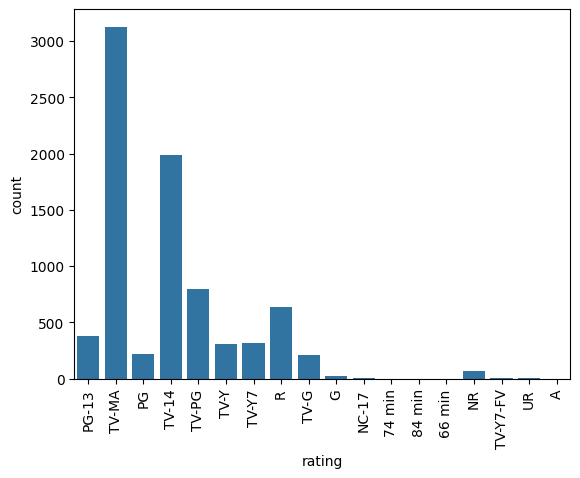

In [ ]:
sns.countplot(x=netflix['rating'],orient='v')
plt.xticks(rotation=90)

Obeservation :

Audience prefers mostly TV-MA & TV-14 and less prefers NC-17 as rating.
There are 17 types of ratings in the netflix.

In [ ]:
netflix['rating'].nunique()


18

Which has the highest rating Tv show or Movies?

In [ ]:
netflix.groupby("type")["rating"].agg(pd.Series.mode)


,rating
type,
Movie,TV-MA
TV Show,TV-MA


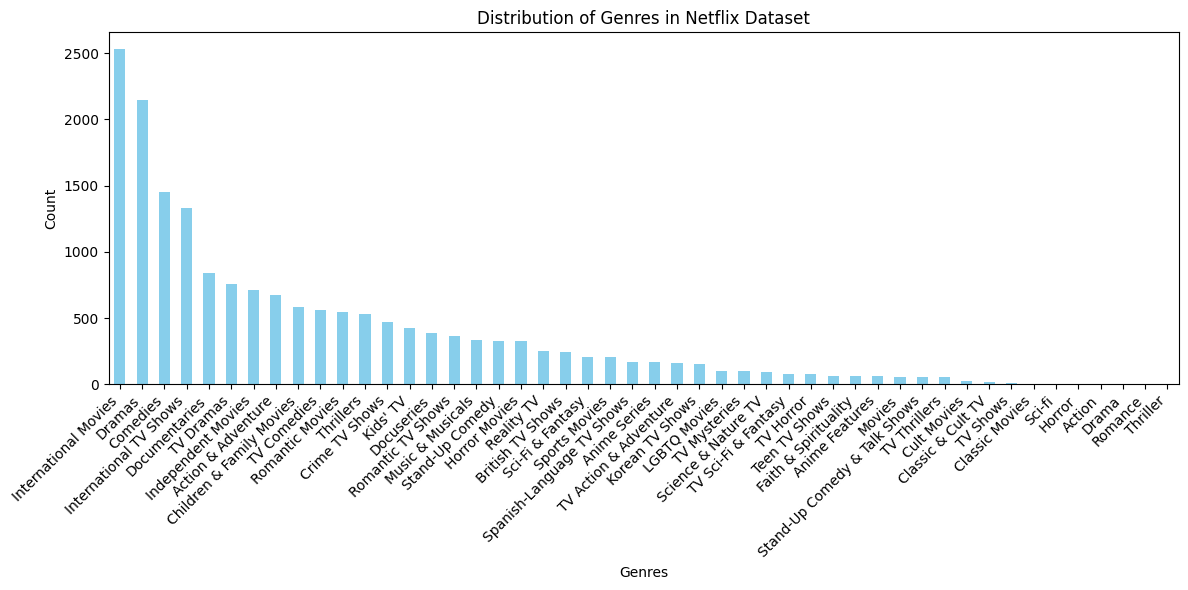

In [ ]:


# Assuming 'netflix' is your DataFrame and 'listed_in' is the column containing the genres

# Step 1: Split the 'listed_in' column by commas, then explode it to get individual genre entries
netflix['genres'] = netflix['listed_in'].str.split(', ')  # Split the genres
genres_exploded = netflix.explode('genres')  # Expand the lists into separate rows

# Step 2: Count the occurrences of each genre
genre_counts = genres_exploded['genres'].value_counts()

# Step 3: Plot the genre counts as a bar chart
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Distribution of Genres in Netflix Dataset')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
new_genre = netflix['listed_in'].str.split(",",n=2)
new_genre

,listed_in
0,[Documentaries]
1,"[International TV Shows, TV Dramas, TV Myste..."
2,"[Crime TV Shows, International TV Shows, TV ..."
3,"[Docuseries, Reality TV]"
4,"[International TV Shows, Romantic TV Shows, ..."
...,...
8804,"[Comedies, Horror Movies]"
8805,"[Children & Family Movies, Comedies]"
8806,"[Dramas, International Movies, Music & Music..."
8807,"[Sci-fi, Horror, Action]"


In [ ]:
netflix['Genre 1'] = new_genre.str.get(0)
netflix['Genre 2'] = new_genre.str.get(1)
netflix['Genre 3'] = new_genre.str.get(2)
netflix.head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genres,Genre 1,Genre 2,Genre 3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,"(Documentaries,)",Documentaries,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,"(International TV Shows, TV Dramas, TV Mysteries)",International TV Shows,TV Dramas,TV Mysteries


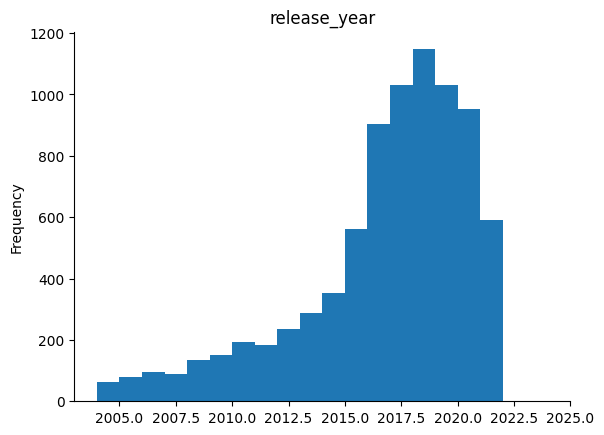

In [ ]:

netflix['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
netflix.groupby(['Genre 1'])['release_year'].count().sort_values(ascending = False)


,release_year
Genre 1,
Dramas,1469
Comedies,1082
Documentaries,812
International TV Shows,764
Action & Adventure,671
Children & Family Movies,557
Crime TV Shows,398
Kids' TV,371
Stand-Up Comedy,317


In [ ]:
netflix.groupby(['Genre 2'])['release_year'].count().sort_values(ascending = False)


,release_year
Genre 2,
International Movies,1611
Dramas,638
Independent Movies,554
International TV Shows,471
Comedies,368
TV Dramas,318
TV Comedies,258
Romantic TV Shows,234
Thrillers,214


In [ ]:
netflix.groupby(['Genre 3'])['release_year'].count().sort_values(ascending = False)


,release_year
Genre 3,
International Movies,794
Romantic Movies,400
TV Dramas,372
Thrillers,266
TV Comedies,189
Music & Musicals,178
Independent Movies,138
Sports Movies,113
Spanish-Language TV Shows,104


In [ ]:
netflix['Genre 1'].describe(include=all)


,Genre 1
count,8090
unique,38
top,Dramas
freq,1469


In [ ]:
netflix['Genre 2'].describe(include=all)


,Genre 2
count,6217
unique,38
top,International Movies
freq,1611


In [ ]:
netflix['Genre 3'].describe(include=all)


,Genre 3
count,3410
unique,33
top,International Movies
freq,794


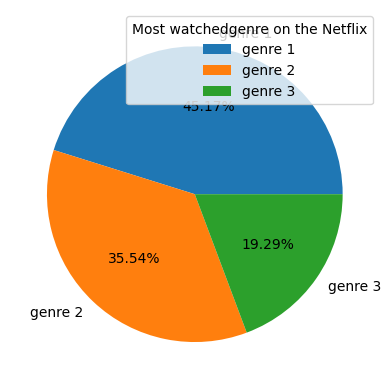

In [ ]:
# by using Pie chart
genre_types = ['genre 1','genre 2','genre 3']

Value_count = [5700,4485,2434]
plt.pie(Value_count, labels = genre_types, autopct="%2.2f%%")
plt.legend(title='Most watchedgenre on the Netflix')
plt.show()

In [ ]:
# converting month number to month name
netflix['month_final'] = netflix['month_added'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
netflix.head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genres,Genre 1,Genre 2,Genre 3,month_final
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,"(Documentaries,)",Documentaries,NaN,NaN,Sep
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,"(International TV Shows, TV Dramas, TV Mysteries)",International TV Shows,TV Dramas,TV Mysteries,Sep


In [ ]:
netflix.month_final.value_counts().to_frame('Value_count')


,Value_count
month_final,
July,767
Dec,724
Apr,714
Sep,693
Mar,692
Oct,691
Aug,675
June,670
Jan,618


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Sep'),
  Text(1, 0, 'Aug'),
  Text(2, 0, 'July'),
  Text(3, 0, 'June'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Apr'),
  Text(6, 0, 'Mar'),
  Text(7, 0, 'Feb'),
  Text(8, 0, 'Jan'),
  Text(9, 0, 'Dec'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Oct')])

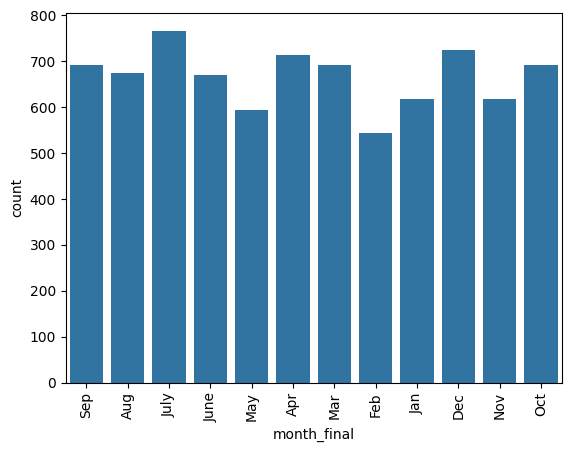

In [ ]:
sns.countplot(x=netflix['month_final'],orient='v')
plt.xticks(rotation=90)

July is the best month to release movies

Categorical VS Categorical Analysis(BIVARIATE ANALYSIS)

In [ ]:
# Create a contingency table to see the relationship between 'Type' and 'Rating'
type_rating_crosstab = pd.crosstab(netflix['type'], netflix['rating'])

# Display the contingency table
print(type_rating_crosstab)

rating   66 min  74 min  84 min  A   G  NC-17  NR   PG  PG-13    R  TV-14  \
type                                                                        
Movie         1       1       1  1  21      3  68  222    379  636   1278   
TV Show       0       0       0  0   0      0   5    0      0    2    708   

rating   TV-G  TV-MA  TV-PG  TV-Y  TV-Y7  TV-Y7-FV  UR  
type                                                    
Movie     122   1988    490   130    138         5   2  
TV Show    85   1138    307   174    180         1   0  


Text(95.72222222222221, 0.5, 'Type')

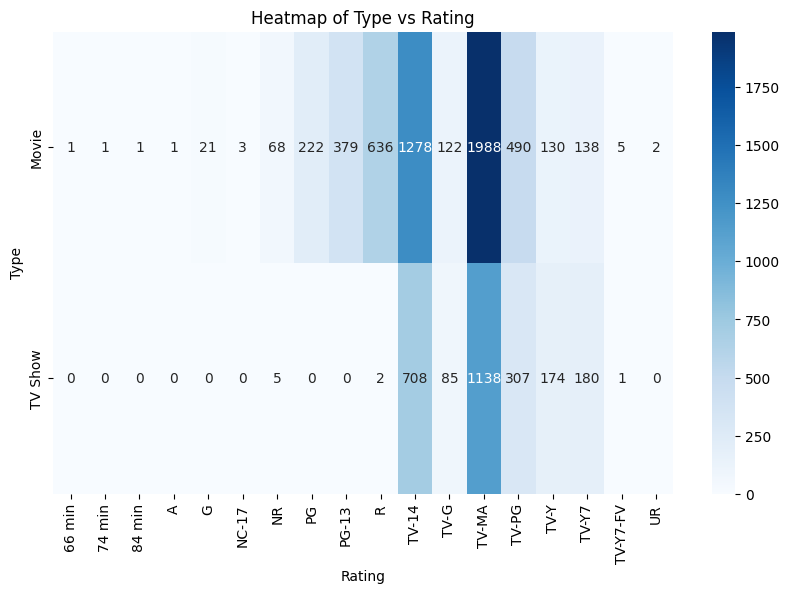

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(type_rating_crosstab, annot=True, cmap="Blues", fmt='g')

# Add labels and title
plt.title('Heatmap of Type vs Rating')
plt.xlabel('Rating')
plt.ylabel('Type')

In [ ]:
netflix.duration.dropna()

3

In [ ]:
netflix.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '9 Seasons',
       '104 min', '127 min', '4 Seasons', '67 min', '94 min', '5 Seasons',
       '61 min', '103 min', '97 min', '106 min', '111 min', '3 Seasons',
       '110 min', '105 min', '96 min', '23 min', '115 min', '88 min',
       '6 Seasons', '102 min', '93 min', '95 min', '85 min', '83 min',
       '113 min', '13 min', '182 min', '48 min', '145 min', '147 min',
       '87 min', '92 min', '80 min', '117 min', '128 min', '119 min',
       '114 min', '99 min', '108 min', '63 min', '121 min', '100 min',
       '82 min', '124 min', '109 min', '118 min', '76 min', '98 min',
       '120 min', '112 min', '86 min', '125 min', '107 min', '135 min',
       '165 min', '136 min', '133 min', '142 min', '116 min', '70 min',
       '122 min', '84 min', '140 min', '78 min', '7 Seasons', '64 min',
       '59 min', '101 min', '139 min', '69 min', '148 min', '138 min',
       '81 min', '143 min', '132 min', '10 Seasons', '123 min', '65 min',
   

here we can see seasons so we try to convert them to minutes for its numerical analysis

In [ ]:
def convert_duration(row):
  if isinstance(row['duration'], str):

    if 'min' in row['duration']:
        return int(row['duration'].replace(' min', ''))  # Movie duration
    elif 'Seasons' in row['duration']:
        # Assuming average episode duration is 30 minutes
        average_episode_duration = 30
        num_seasons = int(row['duration'].split()[0])  # Get the number of seasons
        return num_seasons * 10 * average_episode_duration  # Assume 10 episodes per season
    else:
        return np.nan  # Handle any unexpected format
  else:
        return np.nan # Return NaN if duration is not a string

netflix['numerical_duration'] = netflix.apply(convert_duration, axis=1)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0, 0.5, 'Duration (minutes)')

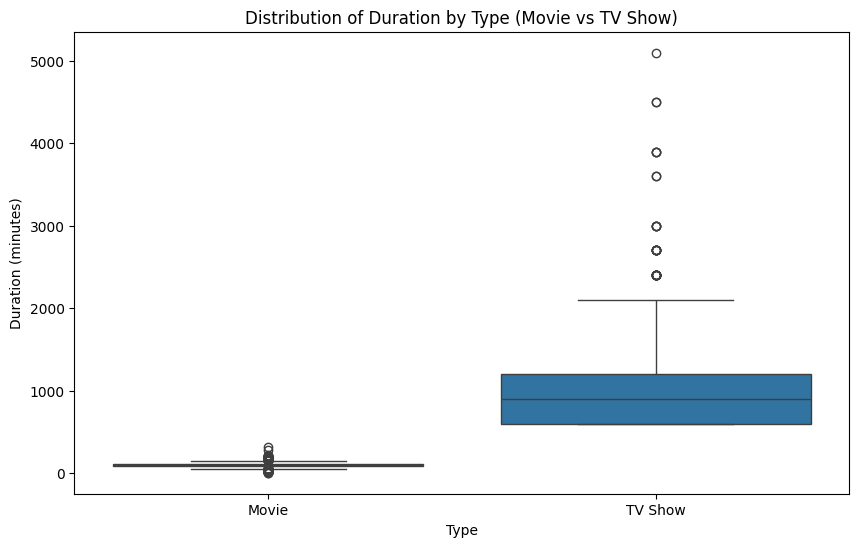

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='numerical_duration', data=netflix)

# Step 3: Add titles and labels
plt.title('Distribution of Duration by Type (Movie vs TV Show)')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')

<ipython-input-148-953390e7addc>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=netflix, x='rating', y='numerical_duration', hue='type', ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


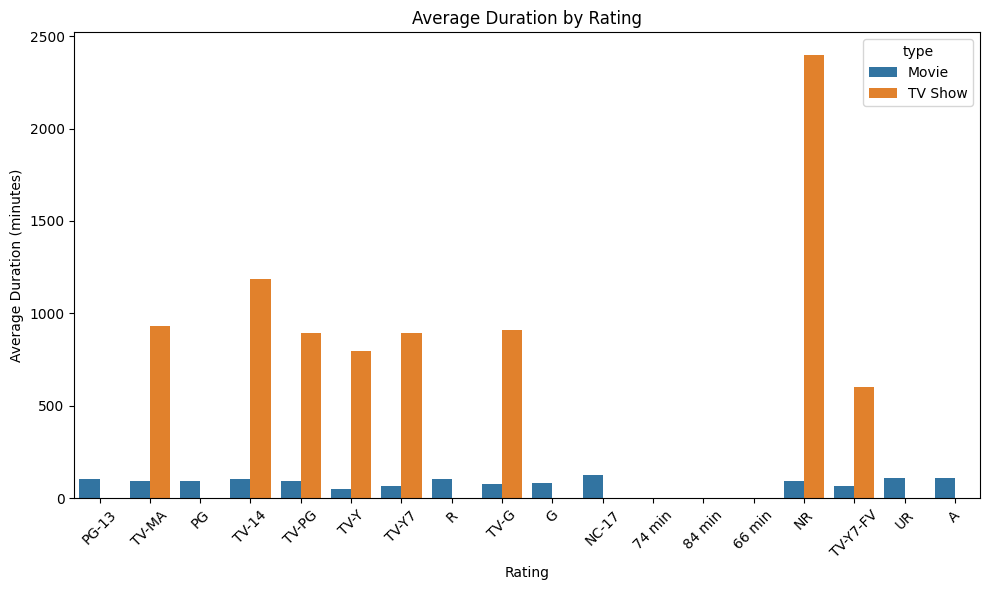

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(data=netflix, x='rating', y='numerical_duration', hue='type', ci=None)

plt.title('Average Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Duration (minutes)')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Duration v/s Release Year

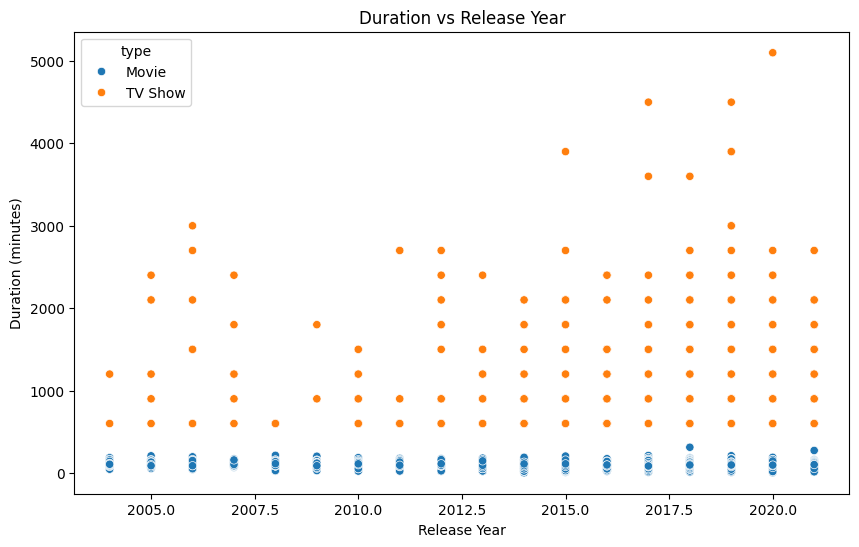

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='numerical_duration', data=netflix,hue='type')

# Step 3: Add titles and labels
plt.title('Duration vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')

# Show the plot
plt.show()

As expected duration of tv shows is higher

In [ ]:
netflix.groupby('type').numerical_duration.mean() #average mean by type

,numerical_duration
type,
Movie,97.743118
TV Show,968.823529


In [ ]:
major_movie_country=netflix['country'].value_counts()[netflix['country'].value_counts() > 50].sort_values(ascending=False)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'South Korea'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Turkey'),
  Text(10, 0, 'Egypt'),
  Text(11, 0, 'Nigeria'),
  Text(12, 0, 'Australia'),
  Text(13, 0, 'Taiwan'),
  Text(14, 0, 'Indonesia'),
  Text(15, 0, 'Brazil'),
  Text(16, 0, 'Philippines'),
  Text(17, 0, 'United States, Canada'),
  Text(18, 0, 'Germany'),
  Text(19, 0, 'China'),
  Text(20, 0, 'United Kingdom, United States'),
  Text(21, 0, 'Thailand'),
  Text(22, 0, 'Argentina')])

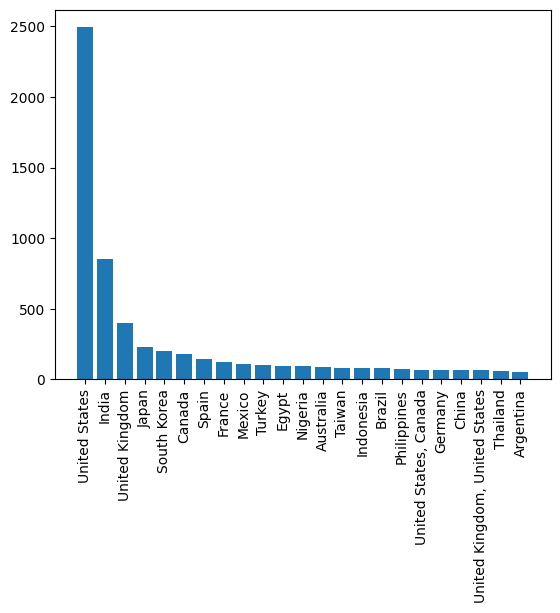

In [ ]:
plt.bar(x=major_movie_country.index,height=major_movie_country.values)
plt.xticks(rotation=90)


Majority of the movies and tv shows are produced by usa